In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile


In [2]:
zipurl='https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall('/tmp/Bike-Sharing-Dataset')
bikes_hour_df_raw=pd.read_csv('/tmp/Bike-Sharing-Dataset/hour.csv')
bikes_day_df_raw = pd.read_csv('/tmp/Bike-Sharing-Dataset/day.csv')


In [3]:
bikes_hour_df_raw['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [4]:
bikes_hour_df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


 This chapter will focus only on hourly data

In [5]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual','registered'],axis=1)

In [6]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [7]:
print(bikes_hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [8]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

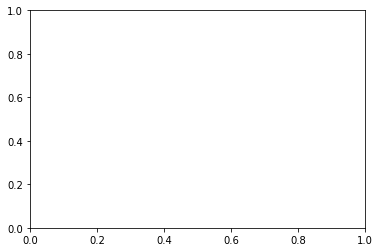

In [9]:
fig,ax = plt.subplots(1)

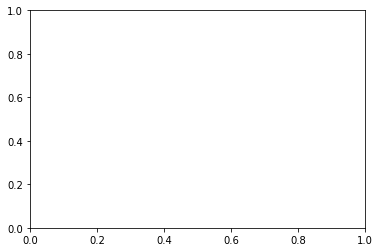

In [10]:
fig,ax= plt.subplots(1)

Text(0.5, 0.98, 'wo shi zhengge tu de mingzi ')

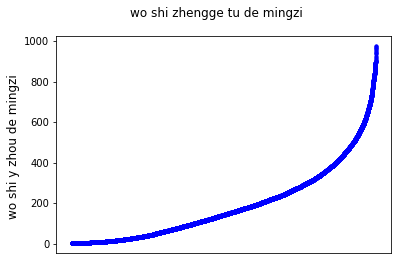

In [21]:
fig,ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']),color='blue',marker='.')

ax.xaxis.set_visible(False)
ax.set_ylabel('wo shi y zhou de mingzi ',fontsize=12)
fig.suptitle('wo shi zhengge tu de mingzi ',fontsize=12)


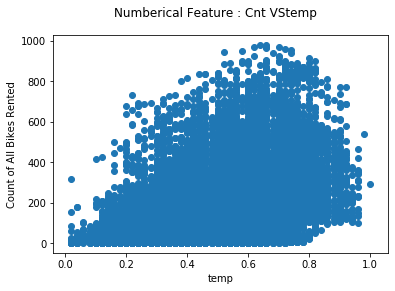

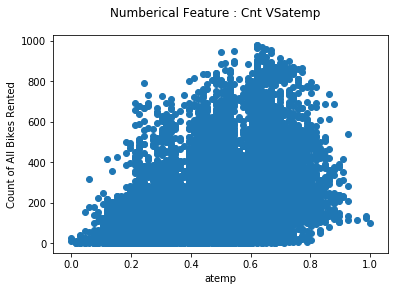

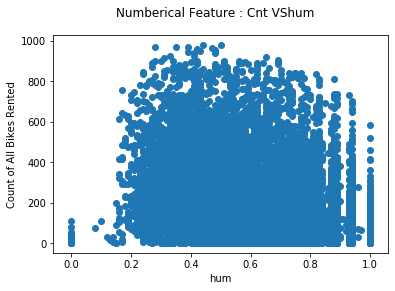

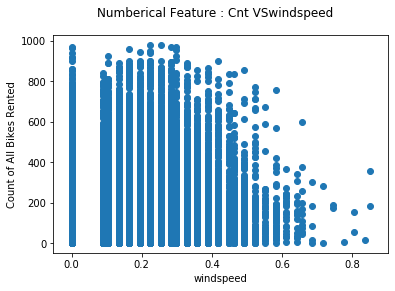

In [23]:
counter_=0
for tp in bikes_hour_df.dtypes:
    if (tp == "float64"):
        bikes_hour_df = bikes_hour_df.sort_values(bikes_hour_df.dtypes.index[counter_])
        feature = bikes_hour_df.dtypes.index[counter_]
        plt.scatter(bikes_hour_df[feature],bikes_hour_df['cnt'])
        plt.suptitle("Numberical Feature : Cnt VS" +feature)
        plt.xlabel(feature)
        plt.ylabel("Count of All Bikes Rented")
        plt.show()
    counter_ +=1